In [4]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import dfols
import signal
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy import interpolate
from stopit import threading_timeoutable as timeoutable
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from batfuns import *
plt.rcParams = set_rc_params(plt.rcParams)

eSOH_DIR = r"F:/Git Hub rep/CRC/neew/PyBaMM/Untitled Folder/data/esoh/"
oCV_DIR = r"F:/Git Hub rep/CRC/neew/PyBaMM/Untitled Folder/data/ocv/"
fig_DIR = "../figures/figures_fit/"
res_DIR = "../data/results_fit/"
# %matplotlib widget

from scipy.io import savemat


In [3]:
## Added from old vrsion 


In [5]:
parameter_values = get_parameter_values()

In [6]:
spm = pybamm.lithium_ion.SPM(
    {
        "SEI": "ec reaction limited",
        "loss of active material": "stress-driven",
    }
)
# spm.print_parameter_info()
param=spm.param

In [14]:


cell = 19




In [15]:
cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
eps_n_data,eps_p_data,c_rate_c,c_rate_d,dis_set,Temp,SOC_0 = init_exp(cell_no,dfe,spm,parameter_values)
print(Temp)

25


In [8]:
# pybamm.set_logging_level("WARNING")
pybamm.set_logging_level("NOTICE")

drive_cycle = pd.read_csv(r"F:\Stefanapolu application\CRC\Drive Cycle\US06_default_5Ah.csv", comment="#", header=None).to_numpy()
drive_cycle2 = pd.read_csv(r"F:\Stefanapolu application\CRC\Drive Cycle\US06_GM_5Ah.csv", comment="#", header=None).to_numpy()

experiment = pybamm.Experiment( # defult D.C. DRC-DRC *1.25
    [
        ("Run US06 (A) for 1 hours",
         "Rest for 5 minutes",
         "Discharge at C/4 for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/4 until 4.2V",
         "Hold at 4.2V for .9 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes", 
         # Home
         "Run US06 (A) for 1 hours",
         "Rest for 5 minutes",
         "Discharge at C/4 for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/8 until 4.2V",
          "Hold at 4.2V for 1.9 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes",     
        )

    ]*520,
    drive_cycles={"US06": drive_cycle},
    termination="50% capacity",
#     cccv_handling="ode",
)

experiment2 = pybamm.Experiment( #lab cycling
    [
        ("Discharge at "+c_rate_d+dis_set,
         "Rest for 5 min",
         "Charge at "+c_rate_c+" until 4.2V", 
         "Hold at 4.2V until C/50")
    ] *300,
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)

## GM_DCRDCR
experiment3 = pybamm.Experiment( #GM_ DRC-DRC
    [
        ("Run US06_GM_5Ah (A) for 1 hours",
         "Rest for 5 minutes",
         "Discharge at C/4 for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/4 until 4.2V",
         "Hold at 4.2V for .6 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes", 
         # Home
         "Run US06_GM_5Ah (A) for 1 hours",
         "Rest for 5 minutes",
         "Discharge at C/4 for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/8 until 4.2V",
          "Hold at 4.2V for 1 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes",     
        )

    ]*540,
    drive_cycles={"US06_GM_5Ah": drive_cycle2},
    termination="50% capacity",
#     cccv_handling="ode",
)

experiment4 = pybamm.Experiment( #Gm-RCRC
    [
        ("Run US06_GM_5Ah (A) for 1 hours",
         "Rest for 5 minutes",
         "Rest for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/4 until 4.2V",
         "Hold at 4.2V for 1.6 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes", 
         # Home
         "Run US06_GM_5Ah (A) for 1 hours",
         "Rest for 5 minutes",
         "Rest for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/8 until 4.2V",
          "Hold at 4.2V for 3.1 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes",     
        )

    ]*540,
    drive_cycles={"US06_GM_5Ah": drive_cycle2},
    termination="50% capacity",
#     cccv_handling="ode",
)

experiment5 = pybamm.Experiment( # defult D.C. RC-RC
    [
        ("Run US06 (A) for 1 hours",
         "Rest for 5 minutes",
         "Rest for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/4 until 4.2V",
         "Hold at 4.2V for 1.8 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes", 
         # Home
         "Run US06 (A) for 1 hours",
         "Rest for 5 minutes",
         "Rest for 1 hours", # should be P/4 
         "Rest for 5 minutes",
         "Charge at C/8 until 4.2V",
          "Hold at 4.2V for 3.7 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes",     
        )

    ]*540,
    drive_cycles={"US06": drive_cycle},
    termination="50% capacity",
#     cccv_handling="ode",
)



experiment6 = pybamm.Experiment( # defult D.C. DRC-DRC *1.25 with power
    [
        ("Run US06 (A) for 1 hours",
         "Rest for 5 minutes",
         #"Discharge at C/4 for 1 hours", # should be P/4 
         "Discharge at 5.25 W for 1 hours", # ~~~ 
         "Rest for 5 minutes",
         "Charge at C/4 until 4.2V",
         "Hold at 4.2V for .75 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes", 
         # Home
         "Run US06 (A) for 1 hours",
         "Rest for 5 minutes",
         #"Discharge at C/4 for 1 hours", # should be P/4 
         "Discharge at 5.25 W for 1 hours", # ~~~
         "Rest for 5 minutes",
         "Charge at C/8 until 4.2V",
          "Hold at 4.2V for 1.75 hours",  # needs fixing : last step +this step =2.5 hrs
         "Rest for 20 minutes",     
        )

    ]*520,
    drive_cycles={"US06": drive_cycle},
    termination="50% capacity",
#     cccv_handling="ode",
)

In [9]:
parameter_values = get_parameter_values()
parameter_values.update(
    {
        "Positive electrode LAM constant proportional term [s-1]": 2.5112e-07,
        "Negative electrode LAM constant proportional term [s-1]": 2.4741e-06,
        "Positive electrode LAM constant exponential term": 1.1942,
        "Negative electrode LAM constant exponential term": 1.1942,
        "Negative electrode active material volume fraction": eps_n_data,
        "Positive electrode active material volume fraction": eps_p_data,
        "Initial temperature [K]": 273.15+Temp,
        "Ambient temperature [K]": 273.15+Temp,
        "SEI kinetic rate constant [m.s-1]": 1.08494281e-16,
        "EC diffusivity [m2.s-1]": 8.30909086e-19,
        "SEI growth activation energy [J.mol-1]": 1.58777981e+04,
        # "SEI kinetic rate constant [m.s-1]": 1.6827e-16,
        # "EC diffusivity [m2.s-1]": 2e-18,
        # "SEI growth activation energy [J.mol-1]": 0,
    },
    check_already_exists=False,
)


In [9]:
# all_sumvars_dict1 = cycle_adaptive_simulation(spm, parameter_values, experiment,SOC_0, save_at_cycles=1)

In [10]:
sim_long = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_long = sim_long.solve(initial_soc=SOC_0, save_at_cycles=10  )

2022-11-08 21:31:15.703 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/520 (44.028 ms elapsed) --------------------
2022-11-08 21:31:15.705 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:31:16.855 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 2/14: Rest for 5 minutes
2022-11-08 21:31:16.951 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:31:17.099 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 4/14: Rest for 5 minutes
2022-11-08 21:31:17.112 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:31:17.371 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:31:17.643 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 7/14: Rest for 20 minutes
2022-11-08 21:31:17.667 - [NOTICE] callbacks.on_step_start(182): Cycle 1/520, step 8/14: Run US

2022-11-08 21:31:32.550 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:31:33.392 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 9/14: Rest for 5 minutes
2022-11-08 21:31:33.402 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:31:33.455 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 11/14: Rest for 5 minutes
2022-11-08 21:31:33.467 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:31:33.652 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:31:33.892 - [NOTICE] callbacks.on_step_start(182): Cycle 5/520, step 14/14: Rest for 20 minutes
2022-11-08 21:31:34.920 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.864 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:31:34.921 - [NOTICE] callbacks.on_cycle_start(174): Cycle 6/

2022-11-08 21:31:50.896 - [NOTICE] callbacks.on_cycle_start(174): Cycle 10/520 (35.237 s elapsed) --------------------
2022-11-08 21:31:50.897 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:31:51.856 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 2/14: Rest for 5 minutes
2022-11-08 21:31:51.872 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:31:51.937 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 4/14: Rest for 5 minutes
2022-11-08 21:31:51.948 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:31:52.074 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:31:52.210 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 7/14: Rest for 20 minutes
2022-11-08 21:31:52.230 - [NOTICE] callbacks.on_step_start(182): Cycle 10/520, step 8/14

2022-11-08 21:32:07.091 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:32:07.923 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 9/14: Rest for 5 minutes
2022-11-08 21:32:07.934 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:32:07.986 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 11/14: Rest for 5 minutes
2022-11-08 21:32:07.999 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:32:08.189 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:32:08.438 - [NOTICE] callbacks.on_step_start(182): Cycle 14/520, step 14/14: Rest for 20 minutes
2022-11-08 21:32:09.479 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.801 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:32:09.480 - [NOTICE] callbacks.on_cycle_start(174): C

2022-11-08 21:32:24.642 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.773 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:32:24.643 - [NOTICE] callbacks.on_cycle_start(174): Cycle 19/520 (1 minute, 9 seconds elapsed) --------------------
2022-11-08 21:32:24.644 - [NOTICE] callbacks.on_step_start(182): Cycle 19/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:32:25.492 - [NOTICE] callbacks.on_step_start(182): Cycle 19/520, step 2/14: Rest for 5 minutes
2022-11-08 21:32:25.505 - [NOTICE] callbacks.on_step_start(182): Cycle 19/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:32:25.559 - [NOTICE] callbacks.on_step_start(182): Cycle 19/520, step 4/14: Rest for 5 minutes
2022-11-08 21:32:25.572 - [NOTICE] callbacks.on_step_start(182): Cycle 19/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:32:25.677 - [NOTICE] callbacks.on_step_start(182): Cycle 19/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:32:25.819 - [NOTICE] callbacks.on_step_

2022-11-08 21:32:40.412 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:32:40.544 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 7/14: Rest for 20 minutes
2022-11-08 21:32:40.564 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:32:41.412 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 9/14: Rest for 5 minutes
2022-11-08 21:32:41.422 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:32:41.477 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 11/14: Rest for 5 minutes
2022-11-08 21:32:41.488 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:32:41.690 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:32:41.927 - [NOTICE] callbacks.on_step_start(182): Cycle 23/520, step 14

2022-11-08 21:32:56.435 - [NOTICE] callbacks.on_step_start(182): Cycle 27/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:32:56.669 - [NOTICE] callbacks.on_step_start(182): Cycle 27/520, step 14/14: Rest for 20 minutes
2022-11-08 21:32:57.755 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.707 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:32:57.756 - [NOTICE] callbacks.on_cycle_start(174): Cycle 28/520 (1 minute, 42 seconds elapsed) --------------------
2022-11-08 21:32:57.756 - [NOTICE] callbacks.on_step_start(182): Cycle 28/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:32:58.653 - [NOTICE] callbacks.on_step_start(182): Cycle 28/520, step 2/14: Rest for 5 minutes
2022-11-08 21:32:58.664 - [NOTICE] callbacks.on_step_start(182): Cycle 28/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:32:58.718 - [NOTICE] callbacks.on_step_start(182): Cycle 28/520, step 4/14: Rest for 5 minutes
2022-11-08 21:32:58.728 - [NOTICE] callbacks.on_step_s

2022-11-08 21:33:13.181 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 4/14: Rest for 5 minutes
2022-11-08 21:33:13.193 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:33:13.292 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:33:13.429 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 7/14: Rest for 20 minutes
2022-11-08 21:33:13.459 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:33:14.384 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 9/14: Rest for 5 minutes
2022-11-08 21:33:14.396 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:33:14.447 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 11/14: Rest for 5 minutes
2022-11-08 21:33:14.458 - [NOTICE] callbacks.on_step_start(182): Cycle 32/520, step 12/14: Charg

2022-11-08 21:33:29.783 - [NOTICE] callbacks.on_step_start(182): Cycle 36/520, step 11/14: Rest for 5 minutes
2022-11-08 21:33:29.794 - [NOTICE] callbacks.on_step_start(182): Cycle 36/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:33:29.980 - [NOTICE] callbacks.on_step_start(182): Cycle 36/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:33:30.236 - [NOTICE] callbacks.on_step_start(182): Cycle 36/520, step 14/14: Rest for 20 minutes
2022-11-08 21:33:31.313 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.641 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:33:31.314 - [NOTICE] callbacks.on_cycle_start(174): Cycle 37/520 (2 minutes, 16 seconds elapsed) --------------------
2022-11-08 21:33:31.315 - [NOTICE] callbacks.on_step_start(182): Cycle 37/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:33:32.146 - [NOTICE] callbacks.on_step_start(182): Cycle 37/520, step 2/14: Rest for 5 minutes
2022-11-08 21:33:32.163 - [NOTICE] callbacks.on_step_st

2022-11-08 21:33:46.526 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 2/14: Rest for 5 minutes
2022-11-08 21:33:46.537 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:33:46.590 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 4/14: Rest for 5 minutes
2022-11-08 21:33:46.601 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:33:46.698 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:33:46.827 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 7/14: Rest for 20 minutes
2022-11-08 21:33:46.846 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:33:47.697 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 9/14: Rest for 5 minutes
2022-11-08 21:33:47.708 - [NOTICE] callbacks.on_step_start(182): Cycle 41/520, step 10/14: Dischar

2022-11-08 21:34:01.822 - [NOTICE] callbacks.on_step_start(182): Cycle 45/520, step 9/14: Rest for 5 minutes
2022-11-08 21:34:01.833 - [NOTICE] callbacks.on_step_start(182): Cycle 45/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:34:01.883 - [NOTICE] callbacks.on_step_start(182): Cycle 45/520, step 11/14: Rest for 5 minutes
2022-11-08 21:34:01.895 - [NOTICE] callbacks.on_step_start(182): Cycle 45/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:34:02.073 - [NOTICE] callbacks.on_step_start(182): Cycle 45/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:34:02.305 - [NOTICE] callbacks.on_step_start(182): Cycle 45/520, step 14/14: Rest for 20 minutes
2022-11-08 21:34:03.342 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.574 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:34:03.343 - [NOTICE] callbacks.on_cycle_start(174): Cycle 46/520 (2 minutes, 48 seconds elapsed) --------------------
2022-11-08 21:34:03.343 - [NOTICE] callbacks.on_st

2022-11-08 21:34:17.095 - [NOTICE] callbacks.on_cycle_start(174): Cycle 50/520 (3 minutes, 1 second elapsed) --------------------
2022-11-08 21:34:17.096 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:34:17.901 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 2/14: Rest for 5 minutes
2022-11-08 21:34:17.911 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:34:17.967 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 4/14: Rest for 5 minutes
2022-11-08 21:34:17.977 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:34:18.068 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:34:18.196 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520, step 7/14: Rest for 20 minutes
2022-11-08 21:34:18.213 - [NOTICE] callbacks.on_step_start(182): Cycle 50/520

2022-11-08 21:34:33.189 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 7/14: Rest for 20 minutes
2022-11-08 21:34:33.206 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:34:34.016 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 9/14: Rest for 5 minutes
2022-11-08 21:34:34.027 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:34:34.078 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 11/14: Rest for 5 minutes
2022-11-08 21:34:34.093 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:34:34.272 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:34:34.514 - [NOTICE] callbacks.on_step_start(182): Cycle 54/520, step 14/14: Rest for 20 minutes
2022-11-08 21:34:35.553 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.507 Ah (o

2022-11-08 21:34:49.009 - [NOTICE] callbacks.on_step_start(182): Cycle 58/520, step 14/14: Rest for 20 minutes
2022-11-08 21:34:50.052 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.477 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:34:50.053 - [NOTICE] callbacks.on_cycle_start(174): Cycle 59/520 (3 minutes, 34 seconds elapsed) --------------------
2022-11-08 21:34:50.054 - [NOTICE] callbacks.on_step_start(182): Cycle 59/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:34:50.843 - [NOTICE] callbacks.on_step_start(182): Cycle 59/520, step 2/14: Rest for 5 minutes
2022-11-08 21:34:50.853 - [NOTICE] callbacks.on_step_start(182): Cycle 59/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:34:50.902 - [NOTICE] callbacks.on_step_start(182): Cycle 59/520, step 4/14: Rest for 5 minutes
2022-11-08 21:34:50.914 - [NOTICE] callbacks.on_step_start(182): Cycle 59/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:34:51.007 - [NOTICE] callbacks.on_step_sta

2022-11-08 21:35:05.251 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:35:05.341 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:35:05.464 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 7/14: Rest for 20 minutes
2022-11-08 21:35:05.482 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:35:06.317 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 9/14: Rest for 5 minutes
2022-11-08 21:35:06.327 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:35:06.380 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 11/14: Rest for 5 minutes
2022-11-08 21:35:06.391 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:35:06.581 - [NOTICE] callbacks.on_step_start(182): Cycle 63/520, step 13/14

2022-11-08 21:35:20.753 - [NOTICE] callbacks.on_step_start(182): Cycle 67/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:35:20.973 - [NOTICE] callbacks.on_step_start(182): Cycle 67/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:35:21.247 - [NOTICE] callbacks.on_step_start(182): Cycle 67/520, step 14/14: Rest for 20 minutes
2022-11-08 21:35:22.264 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.410 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:35:22.265 - [NOTICE] callbacks.on_cycle_start(174): Cycle 68/520 (4 minutes, 7 seconds elapsed) --------------------
2022-11-08 21:35:22.266 - [NOTICE] callbacks.on_step_start(182): Cycle 68/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:35:23.077 - [NOTICE] callbacks.on_step_start(182): Cycle 68/520, step 2/14: Rest for 5 minutes
2022-11-08 21:35:23.087 - [NOTICE] callbacks.on_step_start(182): Cycle 68/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:35:23.140 - [NOTICE] callbacks.on

2022-11-08 21:35:37.606 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:35:37.656 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 4/14: Rest for 5 minutes
2022-11-08 21:35:37.667 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:35:37.759 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:35:37.872 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 7/14: Rest for 20 minutes
2022-11-08 21:35:37.889 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:35:38.687 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 9/14: Rest for 5 minutes
2022-11-08 21:35:38.697 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:35:38.746 - [NOTICE] callbacks.on_step_start(182): Cycle 72/520, step 11/

2022-11-08 21:35:53.721 - [NOTICE] callbacks.on_step_start(182): Cycle 76/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:35:53.776 - [NOTICE] callbacks.on_step_start(182): Cycle 76/520, step 11/14: Rest for 5 minutes
2022-11-08 21:35:53.789 - [NOTICE] callbacks.on_step_start(182): Cycle 76/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:35:53.983 - [NOTICE] callbacks.on_step_start(182): Cycle 76/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:35:54.221 - [NOTICE] callbacks.on_step_start(182): Cycle 76/520, step 14/14: Rest for 20 minutes
2022-11-08 21:35:55.285 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.342 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:35:55.286 - [NOTICE] callbacks.on_cycle_start(174): Cycle 77/520 (4 minutes, 40 seconds elapsed) --------------------
2022-11-08 21:35:55.287 - [NOTICE] callbacks.on_step_start(182): Cycle 77/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:35:56.106 - [NOTICE] callbacks

2022-11-08 21:36:09.852 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:36:10.628 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 2/14: Rest for 5 minutes
2022-11-08 21:36:10.638 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:36:10.690 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 4/14: Rest for 5 minutes
2022-11-08 21:36:10.702 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:36:10.796 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:36:10.915 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 7/14: Rest for 20 minutes
2022-11-08 21:36:10.931 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:36:11.783 - [NOTICE] callbacks.on_step_start(182): Cycle 81/520, step 9/14: Re

2022-11-08 21:36:25.446 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:36:26.286 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 9/14: Rest for 5 minutes
2022-11-08 21:36:26.296 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:36:26.348 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 11/14: Rest for 5 minutes
2022-11-08 21:36:26.359 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:36:26.536 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:36:26.782 - [NOTICE] callbacks.on_step_start(182): Cycle 85/520, step 14/14: Rest for 20 minutes
2022-11-08 21:36:27.839 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.274 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:36:27.840 - [NOTICE] callbacks.on_cycle_start(174): C

2022-11-08 21:36:42.436 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.244 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:36:42.438 - [NOTICE] callbacks.on_cycle_start(174): Cycle 90/520 (5 minutes, 27 seconds elapsed) --------------------
2022-11-08 21:36:42.439 - [NOTICE] callbacks.on_step_start(182): Cycle 90/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:36:43.363 - [NOTICE] callbacks.on_step_start(182): Cycle 90/520, step 2/14: Rest for 5 minutes
2022-11-08 21:36:43.381 - [NOTICE] callbacks.on_step_start(182): Cycle 90/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:36:43.455 - [NOTICE] callbacks.on_step_start(182): Cycle 90/520, step 4/14: Rest for 5 minutes
2022-11-08 21:36:43.467 - [NOTICE] callbacks.on_step_start(182): Cycle 90/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:36:43.571 - [NOTICE] callbacks.on_step_start(182): Cycle 90/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:36:43.699 - [NOTICE] callbacks.on_ste

2022-11-08 21:36:57.916 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:36:58.029 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 7/14: Rest for 20 minutes
2022-11-08 21:36:58.047 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:36:58.844 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 9/14: Rest for 5 minutes
2022-11-08 21:36:58.857 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:36:58.911 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 11/14: Rest for 5 minutes
2022-11-08 21:36:58.923 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:36:59.110 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:36:59.356 - [NOTICE] callbacks.on_step_start(182): Cycle 94/520, step 14

2022-11-08 21:37:14.229 - [NOTICE] callbacks.on_step_start(182): Cycle 98/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:37:14.479 - [NOTICE] callbacks.on_step_start(182): Cycle 98/520, step 14/14: Rest for 20 minutes
2022-11-08 21:37:15.562 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.175 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:37:15.564 - [NOTICE] callbacks.on_cycle_start(174): Cycle 99/520 (6 minutes, 0 seconds elapsed) --------------------
2022-11-08 21:37:15.565 - [NOTICE] callbacks.on_step_start(182): Cycle 99/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:37:16.476 - [NOTICE] callbacks.on_step_start(182): Cycle 99/520, step 2/14: Rest for 5 minutes
2022-11-08 21:37:16.488 - [NOTICE] callbacks.on_step_start(182): Cycle 99/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:37:16.542 - [NOTICE] callbacks.on_step_start(182): Cycle 99/520, step 4/14: Rest for 5 minutes
2022-11-08 21:37:16.553 - [NOTICE] callbacks.on_step_s

2022-11-08 21:37:31.716 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:37:31.775 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 4/14: Rest for 5 minutes
2022-11-08 21:37:31.789 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:37:31.896 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:37:32.035 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 7/14: Rest for 20 minutes
2022-11-08 21:37:32.055 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:37:32.973 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 9/14: Rest for 5 minutes
2022-11-08 21:37:32.984 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:37:33.036 - [NOTICE] callbacks.on_step_start(182): Cycle 103/520,

2022-11-08 21:37:47.531 - [NOTICE] callbacks.on_step_start(182): Cycle 107/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:37:47.584 - [NOTICE] callbacks.on_step_start(182): Cycle 107/520, step 11/14: Rest for 5 minutes
2022-11-08 21:37:47.597 - [NOTICE] callbacks.on_step_start(182): Cycle 107/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:37:47.787 - [NOTICE] callbacks.on_step_start(182): Cycle 107/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:37:48.071 - [NOTICE] callbacks.on_step_start(182): Cycle 107/520, step 14/14: Rest for 20 minutes
2022-11-08 21:37:49.166 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.106 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:37:49.167 - [NOTICE] callbacks.on_cycle_start(174): Cycle 108/520 (6 minutes, 34 seconds elapsed) --------------------
2022-11-08 21:37:49.168 - [NOTICE] callbacks.on_step_start(182): Cycle 108/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:37:50.032 - [NOTICE] ca

2022-11-08 21:38:04.222 - [NOTICE] callbacks.on_cycle_start(174): Cycle 112/520 (6 minutes, 49 seconds elapsed) --------------------
2022-11-08 21:38:04.224 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:38:05.144 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 2/14: Rest for 5 minutes
2022-11-08 21:38:05.154 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:38:05.208 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 4/14: Rest for 5 minutes
2022-11-08 21:38:05.220 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:38:05.332 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:38:05.471 - [NOTICE] callbacks.on_step_start(182): Cycle 112/520, step 7/14: Rest for 20 minutes
2022-11-08 21:38:05.491 - [NOTICE] callbacks.on_step_start(182): Cy

2022-11-08 21:38:21.113 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:38:21.256 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 7/14: Rest for 20 minutes
2022-11-08 21:38:21.275 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:38:22.100 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 9/14: Rest for 5 minutes
2022-11-08 21:38:22.112 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:38:22.166 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 11/14: Rest for 5 minutes
2022-11-08 21:38:22.179 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:38:22.358 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:38:22.602 - [NOTICE] callbacks.on_step_start(182): Cycle 116/520

2022-11-08 21:38:38.071 - [NOTICE] callbacks.on_step_start(182): Cycle 120/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:38:38.329 - [NOTICE] callbacks.on_step_start(182): Cycle 120/520, step 14/14: Rest for 20 minutes
2022-11-08 21:38:39.375 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.006 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:38:39.376 - [NOTICE] callbacks.on_cycle_start(174): Cycle 121/520 (7 minutes, 24 seconds elapsed) --------------------
2022-11-08 21:38:39.378 - [NOTICE] callbacks.on_step_start(182): Cycle 121/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:38:40.263 - [NOTICE] callbacks.on_step_start(182): Cycle 121/520, step 2/14: Rest for 5 minutes
2022-11-08 21:38:40.274 - [NOTICE] callbacks.on_step_start(182): Cycle 121/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:38:40.327 - [NOTICE] callbacks.on_step_start(182): Cycle 121/520, step 4/14: Rest for 5 minutes
2022-11-08 21:38:40.339 - [NOTICE] callbacks.o

2022-11-08 21:38:55.316 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:38:55.369 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 4/14: Rest for 5 minutes
2022-11-08 21:38:55.382 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:38:55.477 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:38:55.599 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 7/14: Rest for 20 minutes
2022-11-08 21:38:55.617 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:38:56.469 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 9/14: Rest for 5 minutes
2022-11-08 21:38:56.481 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:38:56.534 - [NOTICE] callbacks.on_step_start(182): Cycle 125/520,

2022-11-08 21:39:12.077 - [NOTICE] callbacks.on_step_start(182): Cycle 129/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:39:12.132 - [NOTICE] callbacks.on_step_start(182): Cycle 129/520, step 11/14: Rest for 5 minutes
2022-11-08 21:39:12.145 - [NOTICE] callbacks.on_step_start(182): Cycle 129/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:39:12.364 - [NOTICE] callbacks.on_step_start(182): Cycle 129/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:39:12.626 - [NOTICE] callbacks.on_step_start(182): Cycle 129/520, step 14/14: Rest for 20 minutes
2022-11-08 21:39:13.712 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.936 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:39:13.714 - [NOTICE] callbacks.on_cycle_start(174): Cycle 130/520 (7 minutes, 58 seconds elapsed) --------------------
2022-11-08 21:39:13.715 - [NOTICE] callbacks.on_step_start(182): Cycle 130/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:39:14.614 - [NOTICE] ca

2022-11-08 21:39:29.015 - [NOTICE] callbacks.on_cycle_start(174): Cycle 134/520 (8 minutes, 13 seconds elapsed) --------------------
2022-11-08 21:39:29.015 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:39:29.933 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 2/14: Rest for 5 minutes
2022-11-08 21:39:29.943 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:39:29.999 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 4/14: Rest for 5 minutes
2022-11-08 21:39:30.012 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:39:30.109 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:39:30.233 - [NOTICE] callbacks.on_step_start(182): Cycle 134/520, step 7/14: Rest for 20 minutes
2022-11-08 21:39:30.251 - [NOTICE] callbacks.on_step_start(182): Cy

2022-11-08 21:39:45.239 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:39:45.368 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 7/14: Rest for 20 minutes
2022-11-08 21:39:45.386 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:39:46.227 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 9/14: Rest for 5 minutes
2022-11-08 21:39:46.237 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:39:46.289 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 11/14: Rest for 5 minutes
2022-11-08 21:39:46.301 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:39:46.492 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:39:46.798 - [NOTICE] callbacks.on_step_start(182): Cycle 138/520

2022-11-08 21:40:01.619 - [NOTICE] callbacks.on_step_start(182): Cycle 142/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:40:01.853 - [NOTICE] callbacks.on_step_start(182): Cycle 142/520, step 14/14: Rest for 20 minutes
2022-11-08 21:40:02.966 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.834 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:40:02.968 - [NOTICE] callbacks.on_cycle_start(174): Cycle 143/520 (8 minutes, 47 seconds elapsed) --------------------
2022-11-08 21:40:02.968 - [NOTICE] callbacks.on_step_start(182): Cycle 143/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:40:04.035 - [NOTICE] callbacks.on_step_start(182): Cycle 143/520, step 2/14: Rest for 5 minutes
2022-11-08 21:40:04.046 - [NOTICE] callbacks.on_step_start(182): Cycle 143/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:40:04.102 - [NOTICE] callbacks.on_step_start(182): Cycle 143/520, step 4/14: Rest for 5 minutes
2022-11-08 21:40:04.115 - [NOTICE] callbacks.o

2022-11-08 21:40:18.832 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:40:18.885 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 4/14: Rest for 5 minutes
2022-11-08 21:40:18.898 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:40:18.992 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:40:19.114 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 7/14: Rest for 20 minutes
2022-11-08 21:40:19.131 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:40:19.963 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 9/14: Rest for 5 minutes
2022-11-08 21:40:19.973 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:40:20.031 - [NOTICE] callbacks.on_step_start(182): Cycle 147/520,

2022-11-08 21:40:34.382 - [NOTICE] callbacks.on_step_start(182): Cycle 151/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:40:34.432 - [NOTICE] callbacks.on_step_start(182): Cycle 151/520, step 11/14: Rest for 5 minutes
2022-11-08 21:40:34.442 - [NOTICE] callbacks.on_step_start(182): Cycle 151/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:40:34.608 - [NOTICE] callbacks.on_step_start(182): Cycle 151/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:40:34.839 - [NOTICE] callbacks.on_step_start(182): Cycle 151/520, step 14/14: Rest for 20 minutes
2022-11-08 21:40:35.860 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.762 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:40:35.861 - [NOTICE] callbacks.on_cycle_start(174): Cycle 152/520 (9 minutes, 20 seconds elapsed) --------------------
2022-11-08 21:40:35.862 - [NOTICE] callbacks.on_step_start(182): Cycle 152/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:40:36.659 - [NOTICE] ca

2022-11-08 21:40:49.958 - [NOTICE] callbacks.on_cycle_start(174): Cycle 156/520 (9 minutes, 34 seconds elapsed) --------------------
2022-11-08 21:40:49.959 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:40:50.786 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 2/14: Rest for 5 minutes
2022-11-08 21:40:50.796 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:40:50.847 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 4/14: Rest for 5 minutes
2022-11-08 21:40:50.857 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:40:50.952 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:40:51.082 - [NOTICE] callbacks.on_step_start(182): Cycle 156/520, step 7/14: Rest for 20 minutes
2022-11-08 21:40:51.100 - [NOTICE] callbacks.on_step_start(182): Cy

2022-11-08 21:41:04.940 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:41:05.076 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 7/14: Rest for 20 minutes
2022-11-08 21:41:05.094 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:41:05.957 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 9/14: Rest for 5 minutes
2022-11-08 21:41:05.967 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:41:06.017 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 11/14: Rest for 5 minutes
2022-11-08 21:41:06.031 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:41:06.234 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:41:06.506 - [NOTICE] callbacks.on_step_start(182): Cycle 160/520

2022-11-08 21:41:20.615 - [NOTICE] callbacks.on_step_start(182): Cycle 164/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:41:20.853 - [NOTICE] callbacks.on_step_start(182): Cycle 164/520, step 14/14: Rest for 20 minutes
2022-11-08 21:41:21.933 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.658 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:41:21.934 - [NOTICE] callbacks.on_cycle_start(174): Cycle 165/520 (10 minutes, 6 seconds elapsed) --------------------
2022-11-08 21:41:21.935 - [NOTICE] callbacks.on_step_start(182): Cycle 165/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:41:22.750 - [NOTICE] callbacks.on_step_start(182): Cycle 165/520, step 2/14: Rest for 5 minutes
2022-11-08 21:41:22.762 - [NOTICE] callbacks.on_step_start(182): Cycle 165/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:41:22.812 - [NOTICE] callbacks.on_step_start(182): Cycle 165/520, step 4/14: Rest for 5 minutes
2022-11-08 21:41:22.823 - [NOTICE] callbacks.o

2022-11-08 21:41:37.494 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:41:37.577 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 4/14: Rest for 5 minutes
2022-11-08 21:41:37.590 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:41:37.717 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:41:37.939 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 7/14: Rest for 20 minutes
2022-11-08 21:41:37.957 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:41:38.835 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 9/14: Rest for 5 minutes
2022-11-08 21:41:38.846 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:41:38.898 - [NOTICE] callbacks.on_step_start(182): Cycle 169/520,

2022-11-08 21:41:53.517 - [NOTICE] callbacks.on_step_start(182): Cycle 173/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:41:53.571 - [NOTICE] callbacks.on_step_start(182): Cycle 173/520, step 11/14: Rest for 5 minutes
2022-11-08 21:41:53.583 - [NOTICE] callbacks.on_step_start(182): Cycle 173/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:41:53.787 - [NOTICE] callbacks.on_step_start(182): Cycle 173/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:41:54.066 - [NOTICE] callbacks.on_step_start(182): Cycle 173/520, step 14/14: Rest for 20 minutes
2022-11-08 21:41:55.181 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.584 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:41:55.182 - [NOTICE] callbacks.on_cycle_start(174): Cycle 174/520 (10 minutes, 40 seconds elapsed) --------------------
2022-11-08 21:41:55.183 - [NOTICE] callbacks.on_step_start(182): Cycle 174/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:41:56.289 - [NOTICE] c

2022-11-08 21:42:10.698 - [NOTICE] callbacks.on_cycle_start(174): Cycle 178/520 (10 minutes, 55 seconds elapsed) --------------------
2022-11-08 21:42:10.699 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:42:11.598 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 2/14: Rest for 5 minutes
2022-11-08 21:42:11.607 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:42:11.658 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 4/14: Rest for 5 minutes
2022-11-08 21:42:11.670 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:42:11.773 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:42:11.909 - [NOTICE] callbacks.on_step_start(182): Cycle 178/520, step 7/14: Rest for 20 minutes
2022-11-08 21:42:11.931 - [NOTICE] callbacks.on_step_start(182): C

2022-11-08 21:42:27.662 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:42:27.797 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 7/14: Rest for 20 minutes
2022-11-08 21:42:27.816 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:42:28.707 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 9/14: Rest for 5 minutes
2022-11-08 21:42:28.719 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:42:28.770 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 11/14: Rest for 5 minutes
2022-11-08 21:42:28.782 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:42:28.966 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:42:29.213 - [NOTICE] callbacks.on_step_start(182): Cycle 182/520

2022-11-08 21:42:44.173 - [NOTICE] callbacks.on_step_start(182): Cycle 186/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:42:44.451 - [NOTICE] callbacks.on_step_start(182): Cycle 186/520, step 14/14: Rest for 20 minutes
2022-11-08 21:42:45.650 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.477 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:42:45.652 - [NOTICE] callbacks.on_cycle_start(174): Cycle 187/520 (11 minutes, 30 seconds elapsed) --------------------
2022-11-08 21:42:45.652 - [NOTICE] callbacks.on_step_start(182): Cycle 187/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:42:46.504 - [NOTICE] callbacks.on_step_start(182): Cycle 187/520, step 2/14: Rest for 5 minutes
2022-11-08 21:42:46.517 - [NOTICE] callbacks.on_step_start(182): Cycle 187/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:42:46.586 - [NOTICE] callbacks.on_step_start(182): Cycle 187/520, step 4/14: Rest for 5 minutes
2022-11-08 21:42:46.597 - [NOTICE] callbacks.

2022-11-08 21:43:01.767 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:43:01.829 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 4/14: Rest for 5 minutes
2022-11-08 21:43:01.841 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:43:01.942 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:43:02.066 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 7/14: Rest for 20 minutes
2022-11-08 21:43:02.084 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:43:02.930 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 9/14: Rest for 5 minutes
2022-11-08 21:43:02.941 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:43:02.995 - [NOTICE] callbacks.on_step_start(182): Cycle 191/520,

2022-11-08 21:43:18.499 - [NOTICE] callbacks.on_step_start(182): Cycle 195/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:43:18.554 - [NOTICE] callbacks.on_step_start(182): Cycle 195/520, step 11/14: Rest for 5 minutes
2022-11-08 21:43:18.566 - [NOTICE] callbacks.on_step_start(182): Cycle 195/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:43:18.749 - [NOTICE] callbacks.on_step_start(182): Cycle 195/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:43:18.991 - [NOTICE] callbacks.on_step_start(182): Cycle 195/520, step 14/14: Rest for 20 minutes
2022-11-08 21:43:20.168 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.401 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:43:20.169 - [NOTICE] callbacks.on_cycle_start(174): Cycle 196/520 (12 minutes, 5 seconds elapsed) --------------------
2022-11-08 21:43:20.170 - [NOTICE] callbacks.on_step_start(182): Cycle 196/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:43:21.029 - [NOTICE] ca

2022-11-08 21:43:36.107 - [NOTICE] callbacks.on_cycle_start(174): Cycle 200/520 (12 minutes, 20 seconds elapsed) --------------------
2022-11-08 21:43:36.108 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:43:37.164 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 2/14: Rest for 5 minutes
2022-11-08 21:43:37.179 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:43:37.263 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 4/14: Rest for 5 minutes
2022-11-08 21:43:37.284 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:43:37.415 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:43:37.577 - [NOTICE] callbacks.on_step_start(182): Cycle 200/520, step 7/14: Rest for 20 minutes
2022-11-08 21:43:37.601 - [NOTICE] callbacks.on_step_start(182): C

2022-11-08 21:43:52.872 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:43:53.000 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 7/14: Rest for 20 minutes
2022-11-08 21:43:53.019 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:43:53.868 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 9/14: Rest for 5 minutes
2022-11-08 21:43:53.880 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:43:53.934 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 11/14: Rest for 5 minutes
2022-11-08 21:43:53.946 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:43:54.122 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:43:54.367 - [NOTICE] callbacks.on_step_start(182): Cycle 204/520

2022-11-08 21:44:08.251 - [NOTICE] callbacks.on_step_start(182): Cycle 208/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:44:08.491 - [NOTICE] callbacks.on_step_start(182): Cycle 208/520, step 14/14: Rest for 20 minutes
2022-11-08 21:44:09.517 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.289 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:44:09.519 - [NOTICE] callbacks.on_cycle_start(174): Cycle 209/520 (12 minutes, 54 seconds elapsed) --------------------
2022-11-08 21:44:09.519 - [NOTICE] callbacks.on_step_start(182): Cycle 209/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:44:10.353 - [NOTICE] callbacks.on_step_start(182): Cycle 209/520, step 2/14: Rest for 5 minutes
2022-11-08 21:44:10.364 - [NOTICE] callbacks.on_step_start(182): Cycle 209/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:44:10.417 - [NOTICE] callbacks.on_step_start(182): Cycle 209/520, step 4/14: Rest for 5 minutes
2022-11-08 21:44:10.428 - [NOTICE] callbacks.

2022-11-08 21:44:24.400 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:44:24.479 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 4/14: Rest for 5 minutes
2022-11-08 21:44:24.500 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:44:24.656 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:44:24.774 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 7/14: Rest for 20 minutes
2022-11-08 21:44:24.793 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:44:25.657 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 9/14: Rest for 5 minutes
2022-11-08 21:44:25.669 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:44:25.730 - [NOTICE] callbacks.on_step_start(182): Cycle 213/520,

2022-11-08 21:44:41.920 - [NOTICE] callbacks.on_step_start(182): Cycle 217/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:44:41.978 - [NOTICE] callbacks.on_step_start(182): Cycle 217/520, step 11/14: Rest for 5 minutes
2022-11-08 21:44:41.990 - [NOTICE] callbacks.on_step_start(182): Cycle 217/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:44:42.180 - [NOTICE] callbacks.on_step_start(182): Cycle 217/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:44:42.443 - [NOTICE] callbacks.on_step_start(182): Cycle 217/520, step 14/14: Rest for 20 minutes
2022-11-08 21:44:43.523 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.209 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:44:43.524 - [NOTICE] callbacks.on_cycle_start(174): Cycle 218/520 (13 minutes, 28 seconds elapsed) --------------------
2022-11-08 21:44:43.525 - [NOTICE] callbacks.on_step_start(182): Cycle 218/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:44:44.441 - [NOTICE] c

2022-11-08 21:44:58.358 - [NOTICE] callbacks.on_cycle_start(174): Cycle 222/520 (13 minutes, 43 seconds elapsed) --------------------
2022-11-08 21:44:58.358 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:44:59.169 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 2/14: Rest for 5 minutes
2022-11-08 21:44:59.179 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:44:59.234 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 4/14: Rest for 5 minutes
2022-11-08 21:44:59.245 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:44:59.343 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:44:59.462 - [NOTICE] callbacks.on_step_start(182): Cycle 222/520, step 7/14: Rest for 20 minutes
2022-11-08 21:44:59.484 - [NOTICE] callbacks.on_step_start(182): C

2022-11-08 21:45:15.133 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:45:15.279 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 7/14: Rest for 20 minutes
2022-11-08 21:45:15.305 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:45:16.859 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 9/14: Rest for 5 minutes
2022-11-08 21:45:16.873 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:45:16.940 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 11/14: Rest for 5 minutes
2022-11-08 21:45:16.956 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:45:17.154 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:45:17.467 - [NOTICE] callbacks.on_step_start(182): Cycle 226/520

2022-11-08 21:45:31.625 - [NOTICE] callbacks.on_step_start(182): Cycle 230/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:45:31.866 - [NOTICE] callbacks.on_step_start(182): Cycle 230/520, step 14/14: Rest for 20 minutes
2022-11-08 21:45:32.887 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.092 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:45:32.888 - [NOTICE] callbacks.on_cycle_start(174): Cycle 231/520 (14 minutes, 17 seconds elapsed) --------------------
2022-11-08 21:45:32.889 - [NOTICE] callbacks.on_step_start(182): Cycle 231/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:45:33.749 - [NOTICE] callbacks.on_step_start(182): Cycle 231/520, step 2/14: Rest for 5 minutes
2022-11-08 21:45:33.758 - [NOTICE] callbacks.on_step_start(182): Cycle 231/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:45:33.812 - [NOTICE] callbacks.on_step_start(182): Cycle 231/520, step 4/14: Rest for 5 minutes
2022-11-08 21:45:33.823 - [NOTICE] callbacks.

2022-11-08 21:45:48.368 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:45:48.418 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 4/14: Rest for 5 minutes
2022-11-08 21:45:48.430 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:45:48.536 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:45:48.698 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 7/14: Rest for 20 minutes
2022-11-08 21:45:48.736 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:45:49.557 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 9/14: Rest for 5 minutes
2022-11-08 21:45:49.568 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:45:49.629 - [NOTICE] callbacks.on_step_start(182): Cycle 235/520,

2022-11-08 21:46:03.506 - [NOTICE] callbacks.on_step_start(182): Cycle 239/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:46:03.558 - [NOTICE] callbacks.on_step_start(182): Cycle 239/520, step 11/14: Rest for 5 minutes
2022-11-08 21:46:03.568 - [NOTICE] callbacks.on_step_start(182): Cycle 239/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:46:03.743 - [NOTICE] callbacks.on_step_start(182): Cycle 239/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:46:03.978 - [NOTICE] callbacks.on_step_start(182): Cycle 239/520, step 14/14: Rest for 20 minutes
2022-11-08 21:46:04.991 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 3.007 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:46:04.992 - [NOTICE] callbacks.on_cycle_start(174): Cycle 240/520 (14 minutes, 49 seconds elapsed) --------------------
2022-11-08 21:46:04.993 - [NOTICE] callbacks.on_step_start(182): Cycle 240/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:46:05.864 - [NOTICE] c

2022-11-08 21:46:19.222 - [NOTICE] callbacks.on_cycle_start(174): Cycle 244/520 (15 minutes, 4 seconds elapsed) --------------------
2022-11-08 21:46:19.223 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:46:20.079 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 2/14: Rest for 5 minutes
2022-11-08 21:46:20.090 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:46:20.147 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 4/14: Rest for 5 minutes
2022-11-08 21:46:20.160 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:46:20.313 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:46:20.451 - [NOTICE] callbacks.on_step_start(182): Cycle 244/520, step 7/14: Rest for 20 minutes
2022-11-08 21:46:20.469 - [NOTICE] callbacks.on_step_start(182): Cy

2022-11-08 21:46:34.460 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:46:34.574 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 7/14: Rest for 20 minutes
2022-11-08 21:46:34.592 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:46:35.468 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 9/14: Rest for 5 minutes
2022-11-08 21:46:35.481 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:46:35.535 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 11/14: Rest for 5 minutes
2022-11-08 21:46:35.546 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:46:36.027 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:46:36.258 - [NOTICE] callbacks.on_step_start(182): Cycle 248/520

2022-11-08 21:46:50.434 - [NOTICE] callbacks.on_step_start(182): Cycle 252/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:46:50.726 - [NOTICE] callbacks.on_step_start(182): Cycle 252/520, step 14/14: Rest for 20 minutes
2022-11-08 21:46:51.854 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 2.881 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:46:51.855 - [NOTICE] callbacks.on_cycle_start(174): Cycle 253/520 (15 minutes, 36 seconds elapsed) --------------------
2022-11-08 21:46:51.856 - [NOTICE] callbacks.on_step_start(182): Cycle 253/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:46:52.711 - [NOTICE] callbacks.on_step_start(182): Cycle 253/520, step 2/14: Rest for 5 minutes
2022-11-08 21:46:52.722 - [NOTICE] callbacks.on_step_start(182): Cycle 253/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:46:52.791 - [NOTICE] callbacks.on_step_start(182): Cycle 253/520, step 4/14: Rest for 5 minutes
2022-11-08 21:46:52.804 - [NOTICE] callbacks.

2022-11-08 21:47:08.012 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:47:08.077 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 4/14: Rest for 5 minutes
2022-11-08 21:47:08.090 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:47:08.189 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:47:08.344 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 7/14: Rest for 20 minutes
2022-11-08 21:47:08.365 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:47:09.247 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 9/14: Rest for 5 minutes
2022-11-08 21:47:09.260 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:47:09.319 - [NOTICE] callbacks.on_step_start(182): Cycle 257/520,

2022-11-08 21:47:23.806 - [NOTICE] callbacks.on_step_start(182): Cycle 261/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:47:23.863 - [NOTICE] callbacks.on_step_start(182): Cycle 261/520, step 11/14: Rest for 5 minutes
2022-11-08 21:47:23.874 - [NOTICE] callbacks.on_step_start(182): Cycle 261/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:47:24.107 - [NOTICE] callbacks.on_step_start(182): Cycle 261/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:47:24.359 - [NOTICE] callbacks.on_step_start(182): Cycle 261/520, step 14/14: Rest for 20 minutes
2022-11-08 21:47:25.395 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 2.788 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:47:25.396 - [NOTICE] callbacks.on_cycle_start(174): Cycle 262/520 (16 minutes, 10 seconds elapsed) --------------------
2022-11-08 21:47:25.397 - [NOTICE] callbacks.on_step_start(182): Cycle 262/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:47:26.294 - [NOTICE] c

2022-11-08 21:47:40.352 - [NOTICE] callbacks.on_cycle_start(174): Cycle 266/520 (16 minutes, 25 seconds elapsed) --------------------
2022-11-08 21:47:40.353 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:47:41.199 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 2/14: Rest for 5 minutes
2022-11-08 21:47:41.210 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:47:41.261 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 4/14: Rest for 5 minutes
2022-11-08 21:47:41.273 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:47:41.368 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:47:41.486 - [NOTICE] callbacks.on_step_start(182): Cycle 266/520, step 7/14: Rest for 20 minutes
2022-11-08 21:47:41.506 - [NOTICE] callbacks.on_step_start(182): C

2022-11-08 21:47:55.423 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:47:55.543 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 7/14: Rest for 20 minutes
2022-11-08 21:47:55.561 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:47:56.403 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 9/14: Rest for 5 minutes
2022-11-08 21:47:56.413 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:47:56.466 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 11/14: Rest for 5 minutes
2022-11-08 21:47:56.477 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:47:56.660 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:47:56.896 - [NOTICE] callbacks.on_step_start(182): Cycle 270/520

2022-11-08 21:48:10.903 - [NOTICE] callbacks.on_step_start(182): Cycle 274/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:48:11.146 - [NOTICE] callbacks.on_step_start(182): Cycle 274/520, step 14/14: Rest for 20 minutes
2022-11-08 21:48:12.181 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 2.643 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:48:12.183 - [NOTICE] callbacks.on_cycle_start(174): Cycle 275/520 (16 minutes, 57 seconds elapsed) --------------------
2022-11-08 21:48:12.183 - [NOTICE] callbacks.on_step_start(182): Cycle 275/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:48:13.031 - [NOTICE] callbacks.on_step_start(182): Cycle 275/520, step 2/14: Rest for 5 minutes
2022-11-08 21:48:13.042 - [NOTICE] callbacks.on_step_start(182): Cycle 275/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:48:13.093 - [NOTICE] callbacks.on_step_start(182): Cycle 275/520, step 4/14: Rest for 5 minutes
2022-11-08 21:48:13.103 - [NOTICE] callbacks.

2022-11-08 21:48:27.215 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:48:27.271 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 4/14: Rest for 5 minutes
2022-11-08 21:48:27.283 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:48:27.387 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:48:27.512 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 7/14: Rest for 20 minutes
2022-11-08 21:48:27.531 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 8/14: Run US06 (A) for 1 hours
2022-11-08 21:48:28.381 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 9/14: Rest for 5 minutes
2022-11-08 21:48:28.392 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:48:28.450 - [NOTICE] callbacks.on_step_start(182): Cycle 279/520,

2022-11-08 21:48:42.968 - [NOTICE] callbacks.on_step_start(182): Cycle 283/520, step 10/14: Discharge at C/4 for 1 hours
2022-11-08 21:48:43.022 - [NOTICE] callbacks.on_step_start(182): Cycle 283/520, step 11/14: Rest for 5 minutes
2022-11-08 21:48:43.034 - [NOTICE] callbacks.on_step_start(182): Cycle 283/520, step 12/14: Charge at C/8 until 4.2V
2022-11-08 21:48:43.230 - [NOTICE] callbacks.on_step_start(182): Cycle 283/520, step 13/14: Hold at 4.2V for 1.9 hours
2022-11-08 21:48:43.457 - [NOTICE] callbacks.on_step_start(182): Cycle 283/520, step 14/14: Rest for 20 minutes
2022-11-08 21:48:44.483 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 2.530 Ah (originally 4.891 Ah, will stop at 2.445 Ah)
2022-11-08 21:48:44.484 - [NOTICE] callbacks.on_cycle_start(174): Cycle 284/520 (17 minutes, 29 seconds elapsed) --------------------
2022-11-08 21:48:44.485 - [NOTICE] callbacks.on_step_start(182): Cycle 284/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:48:45.425 - [NOTICE] c

2022-11-08 21:48:58.694 - [NOTICE] callbacks.on_cycle_start(174): Cycle 288/520 (17 minutes, 43 seconds elapsed) --------------------
2022-11-08 21:48:58.695 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 1/14: Run US06 (A) for 1 hours
2022-11-08 21:48:59.555 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 2/14: Rest for 5 minutes
2022-11-08 21:48:59.564 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 3/14: Discharge at C/4 for 1 hours
2022-11-08 21:48:59.616 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 4/14: Rest for 5 minutes
2022-11-08 21:48:59.626 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 5/14: Charge at C/4 until 4.2V
2022-11-08 21:48:59.716 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 6/14: Hold at 4.2V for .9 hours
2022-11-08 21:48:59.836 - [NOTICE] callbacks.on_step_start(182): Cycle 288/520, step 7/14: Rest for 20 minutes
2022-11-08 21:48:59.855 - [NOTICE] callbacks.on_step_start(182): C

In [11]:
qwrqwf

NameError: name 'qwrqwf' is not defined

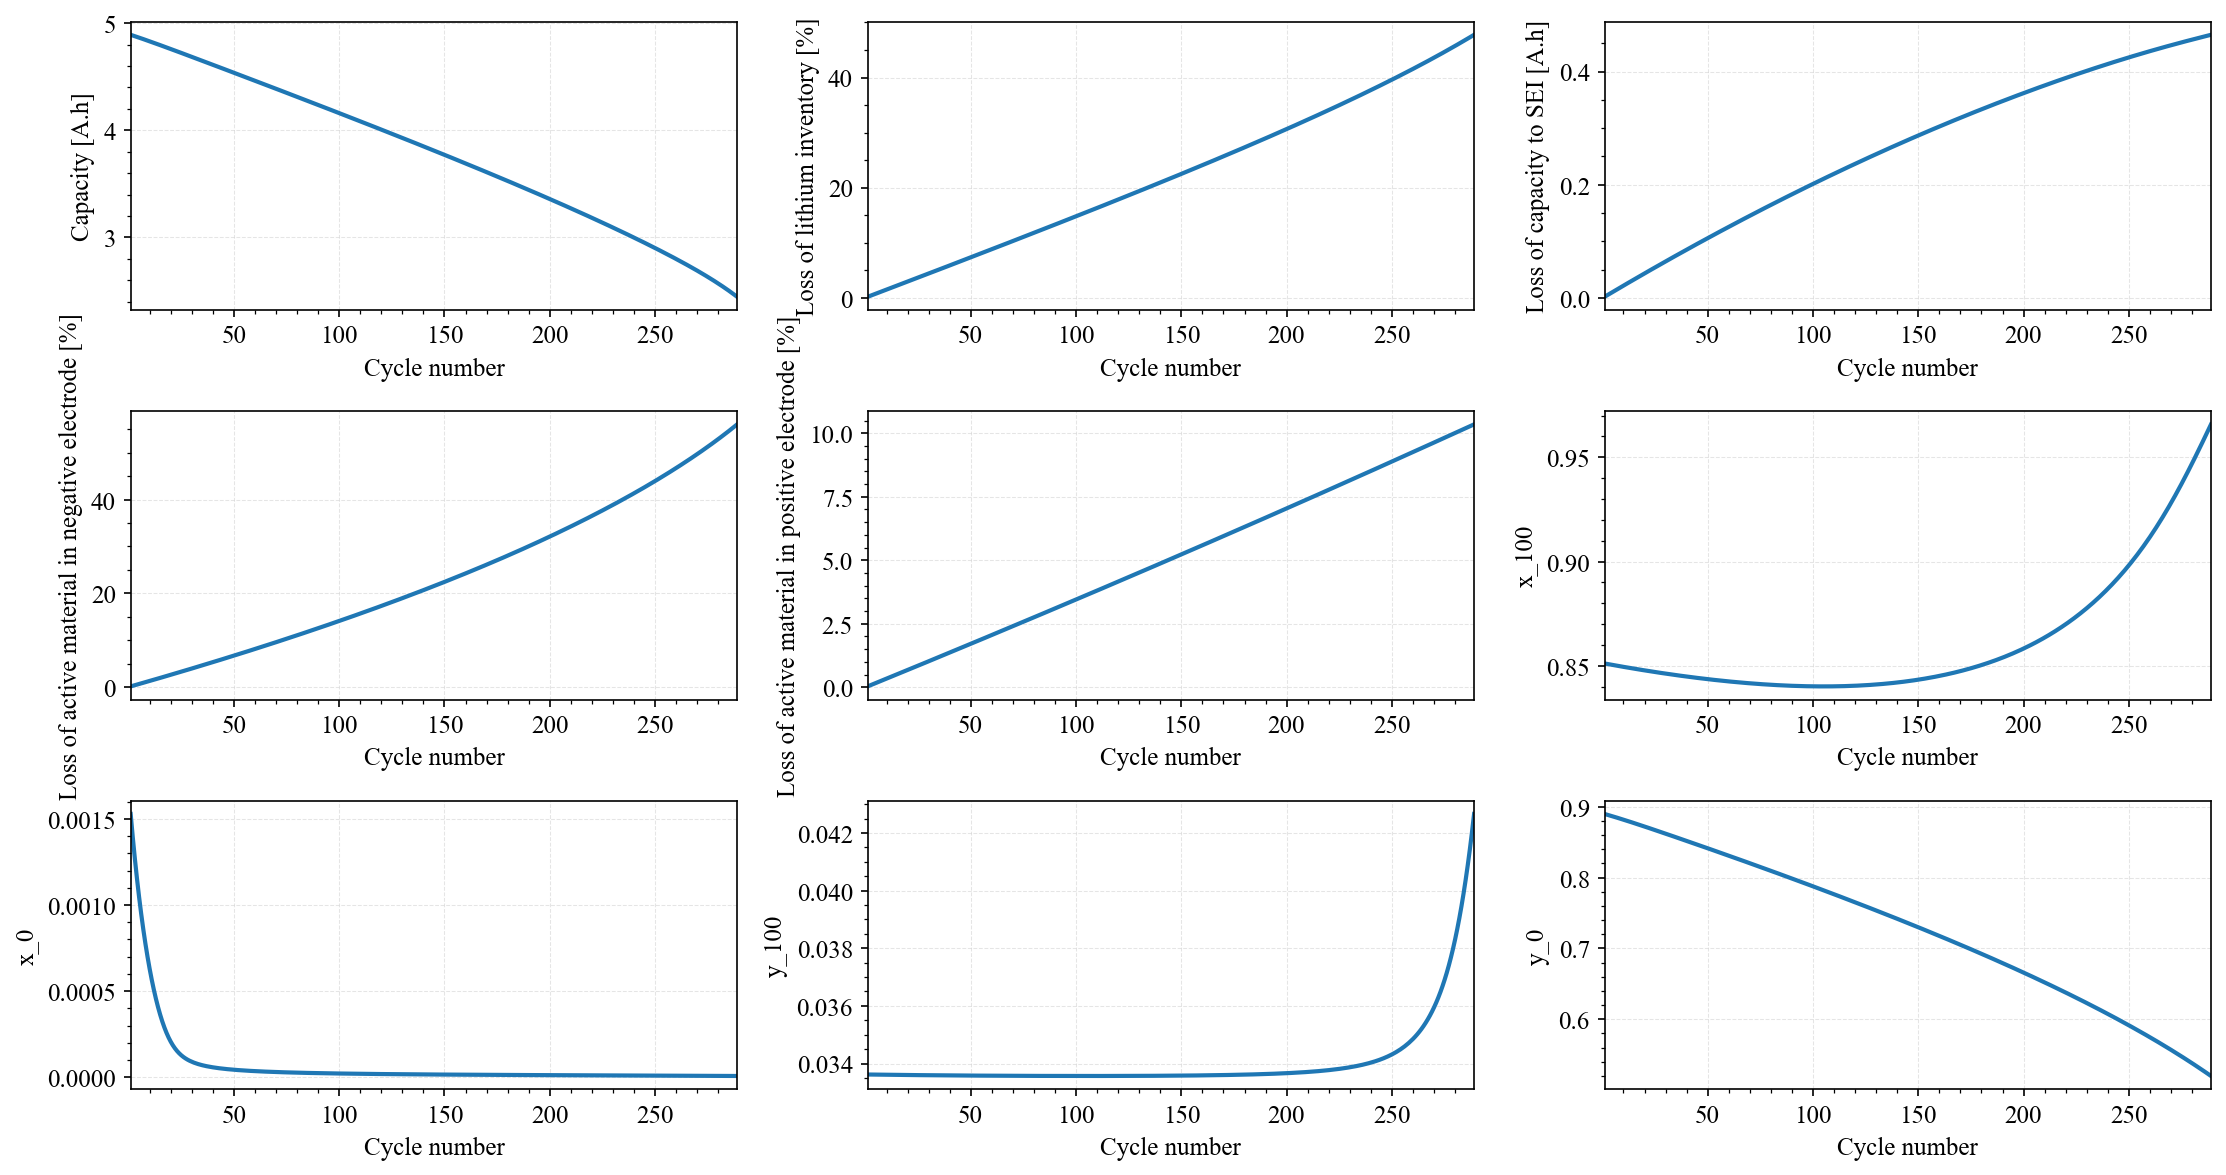

array([[<AxesSubplot: xlabel='Cycle number', ylabel='Capacity [A.h]'>,
        <AxesSubplot: xlabel='Cycle number', ylabel='Loss of lithium inventory [%]'>,
        <AxesSubplot: xlabel='Cycle number', ylabel='Loss of capacity to SEI [A.h]'>],
       [<AxesSubplot: xlabel='Cycle number', ylabel='Loss of active material in negative electrode [%]'>,
        <AxesSubplot: xlabel='Cycle number', ylabel='Loss of active material in positive electrode [%]'>,
        <AxesSubplot: xlabel='Cycle number', ylabel='x_100'>],
       [<AxesSubplot: xlabel='Cycle number', ylabel='x_0'>,
        <AxesSubplot: xlabel='Cycle number', ylabel='y_100'>,
        <AxesSubplot: xlabel='Cycle number', ylabel='y_0'>]], dtype=object)

In [11]:
pybamm.plot_summary_variables(sol_long)

In [12]:
sim_long.plot(
    [
#         "Negative particle surface concentration [mol.m-3]",
#         "Electrolyte concentration [mol.m-3]",
#         "Positive particle surface concentration [mol.m-3]",
        "Current [A]",
#         "Negative electrode potential [V]",
#         "Electrolyte potential [V]",
#         "Positive electrode potential [V]",
        "Terminal voltage [V]",
#         "X-averaged cell temperature",
        "Negative electrode SOC",
        "Positive electrode SOC",
#         "SEI thickness [m]",
        "Loss of capacity to SEI [A.h]",
        "Negative electrode capacity [A.h]",
        "Positive electrode capacity [A.h]",
        "Discharge capacity [A.h]"

        
    ]
)

interactive(children=(FloatSlider(value=0.0, description='t', max=3681.8174635768, step=36.818174635768), Outp…

In [12]:
#print(list(sol_long.summary_variables.keys()))

In [13]:
type(sol_long.summary_variables[list(sol_long.summary_variables.keys())[1]])

numpy.ndarray

In [ ]:
# mdic={}
# for i in range (1):
# # range(len(sol_long.summary_variables)):
# #     stringing=''.join([list(sol_long.summary_variables.keys())[i]])
#     mdic={f"{i}": sol_long.summary_variables[list(sol_long.summary_variables.keys())[i]]}
# savemat("summary",mdic)


In [14]:
x100=sol_long.summary_variables["x_100"]
y100=sol_long.summary_variables["y_100"]
x0=sol_long.summary_variables["x_0"]
y0=sol_long.summary_variables["y_0"]
Cap=sol_long.summary_variables["Capacity [A.h]"]
LoC_SEI_summ=sol_long.summary_variables["Loss of capacity to SEI [A.h]"]
LAM_P=sol_long.summary_variables["Loss of active material in positive electrode [%]"]
LAM_N=sol_long.summary_variables["Loss of active material in negative electrode [%]"]
C_Neg=sol_long.summary_variables["C_n"]
C_pos=sol_long.summary_variables["C_p"]
LLI=sol_long.summary_variables["Loss of lithium inventory [%]"]
cycle_num=sol_long.summary_variables["Cycle number"]
t = sol_long["Time [s]"].entries
I = sol_long["Current [A]"].entries
Q = sol_long['Discharge capacity [A.h]'].entries
LoC_SEI = sol_long["Loss of capacity to SEI [A.h]"].entries
N_SoC = sol_long["Negative electrode SOC"].entries
P_SoC = sol_long["Positive electrode SOC"].entries
ECM_res=sol_long.summary_variables["Local ECM resistance [Ohm]"]

ECM_whole_res=sol_long["Local ECM resistance [Ohm]"].entries
ECM_sum_res=sol_long.summary_variables["Local ECM resistance [Ohm]"]
ECM_sum_res_change=sol_long.summary_variables['Change in local ECM resistance [Ohm]']
cycle_time=sol_long.summary_variables['Time [s]']
# exp = 30e6*sol_0["Cell thickness change [m]"].entries
# exp_n = 30e6*sol_0["Negative Electrode thickness change [m]"].entries
# exp_p = 30e6*sol_0["Positive Electrode thickness change [m]"].entries
# ee_p = sol_0["X-averaged positive electrode porosity"].entries
# ee_n = sol_0["X-averaged negative electrode porosity"].entries
# ee_s = sol_0["X-averaged separator porosity"].entries
# j_n = sol_0["X-averaged negative electrode total interfacial current density [A.m-2]"].entries
# j_p = sol_0["X-averaged positive electrode total interfacial current density [A.m-2]"].entries

# x = sol_0["x [m]"].entries
# c_e_0 = sol_0["Electrolyte concentration [mol.m-3]"].entries

In [15]:
ident=""
mdic = {"x100"+ident: x100, "y100"+ident:y100, "x0"+ident:x0,"y0"+ident:y0,"Cap"+ident:Cap,
        "LoC_SEI_summ"+ident:LoC_SEI_summ,
        "LAM_P"+ident:LAM_P,"LAM_N"+ident:LAM_N,"C_Neg"+ident:C_Neg,"C_pos"+ident:C_pos,
        "LLI"+ident:LLI,"cycle_num"+ident:cycle_num,
        "t"+ident:t,"LoC_SEI"+ident:LoC_SEI,"N_SoC"+ident:N_SoC,"P_SoC"+ident:P_SoC,
        "Q"+ident:Q, "I"+ident:I,    
        "ECM_whole_res":ECM_whole_res,"ECM_sum_res":ECM_sum_res,
        "ECM_sum_res_change":ECM_sum_res_change,"cycle_time":cycle_time 
       }
savemat("Outputs_Nov08_Default_DRC_DRC_Cell19",mdic)

In [ ]:
# savemat("x100_test", mdic)


In [ ]:
# print(x100)

In [ ]:
# import csv
# with open(r"F:\Git Hub rep\CRC\neew\PyBaMM\Untitled Folder\whatever.csv", 'w') as f:
#     # create the csv writer
#     writer = csv.writer(f)

# write a row to the csv file
# i=1
# for lines in sol_long.all_summary_variables:
# #     writer.writerow(words)
#     i=i+1
#     savemat(f'{i:02d}', lines)


In [ ]:
type(x100)

In [20]:
sol_long.variables.search("charge")

AttributeError: 'Solution' object has no attribute 'variables'

In [ ]:
# plt.plot(sol_long["Time [s]"].entries[1:15133], sol_long["Current [A]"].entries[1:15133])

In [ ]:
# plt.plot(sol_long["Time [s]"].entries[1:15133], sol_long["Terminal voltage [V]"].entries[1:15133])

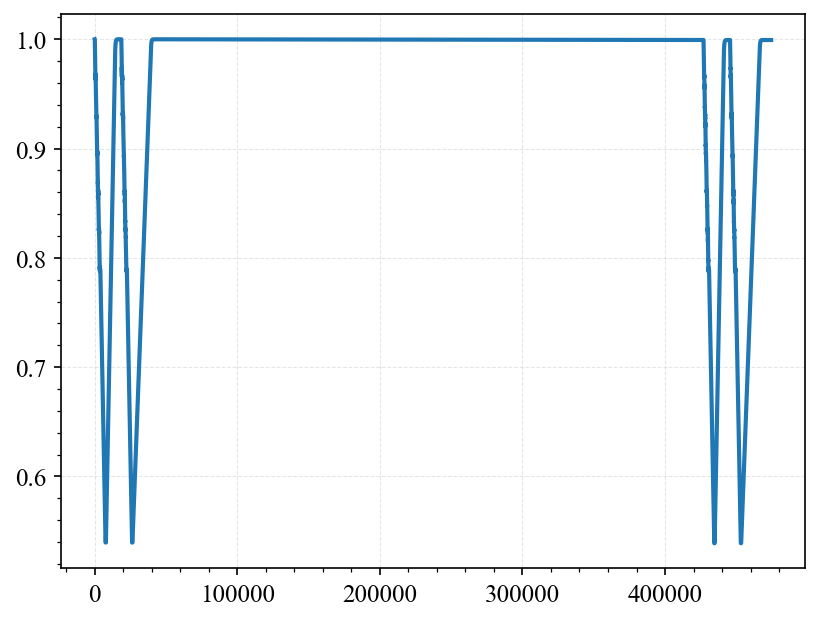

In [18]:
 plt.plot(sol_long["Time [s]"].entries, 1-sol_long["Discharge capacity [A.h]"].entries/5)

In [15]:
sol_long["Time [s]"].entries

array([0.00000000e+00, 5.00000000e-01, 1.00000000e+00, ...,
       1.94515549e+07, 1.94516149e+07, 1.94516749e+07])

In [18]:
spm.variables.search("resistance")

Local ECM resistance
Local ECM resistance [Ohm]
Resistance [Ohm]
X-averaged negative electrode resistance [Ohm.m2]


In [19]:
sim_long.plot(["Local ECM resistance",
"Local ECM resistance [Ohm]",
               "Resistance [Ohm]"])


interactive(children=(FloatSlider(value=0.0, description='t', max=131.7901042053284, step=1.317901042053284), …

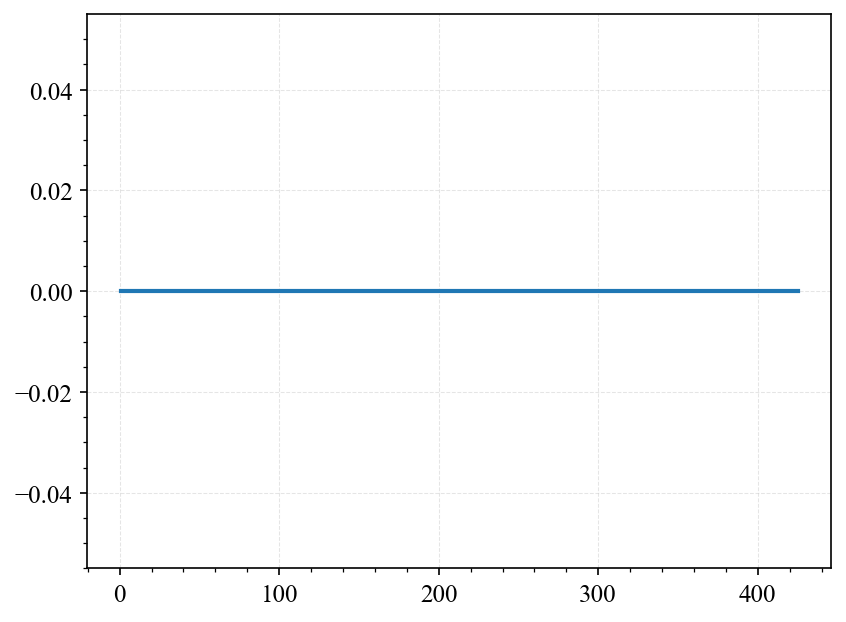

In [25]:
 plt.plot(cycle_num,ECM_res)

In [32]:
sol_long.summary_variables 

{'Minimum measured discharge capacity [A.h]': array([0.        , 0.0001538 , 0.00030761, 0.00046154, 0.0006156 ,
        0.00076976, 0.00092404, 0.00107854, 0.00123316, 0.00138786,
        0.00154271, 0.00169767, 0.00185276, 0.00200798, 0.00216332,
        0.00231881, 0.0024744 , 0.0026301 , 0.00278589, 0.00294188,
        0.00309803, 0.00325424, 0.00341059, 0.00356709, 0.00372373,
        0.00388047, 0.00403732, 0.00419426, 0.00435135, 0.00450856,
        0.0046659 , 0.00482332, 0.00498085, 0.00513855, 0.00529637,
        0.00545429, 0.00561232, 0.00577052, 0.00592878, 0.00608717,
        0.0062457 , 0.00640434, 0.006563  , 0.00672183, 0.00688081,
        0.00703986, 0.00719908, 0.00735841, 0.00751779, 0.00767734,
        0.00783699, 0.00799677, 0.00815667, 0.00831667, 0.00847675,
        0.00863698, 0.00879726, 0.0089577 , 0.00911817, 0.00927881,
        0.00943958, 0.00960039, 0.00976137, 0.00992245, 0.0100836 ,
        0.01024487, 0.01040624, 0.01056773, 0.0107293 , 0.01089104,
   

In [2]:
spm.variables.search("resistance")

NameError: name 'spm' is not defined

In [17]:
spm.param.n.prim